# Python xercises for Hughes and Hase: Chapter 3

Python activities to complement Measurements and their Uncertainties, Chapter 3, "Uncertainties as probabilities." Section numbers in the book correspond to those listed below.
To use a module, first read the appropriate chapter in the textbook, and then read the module. 
<-- Explain how to use Jupyter notebook!!! -->
Most modules will include an exercise for you to practice what you have learned. After you are done, save the result in a pdf file for submission to Canvas. 
<-- this has to be modified -->

Author: J. S. Dodge, 2016

## 3.1 Distributions and probability
scipy library in Python defines several common probability distributions. Consider the normal distribution.

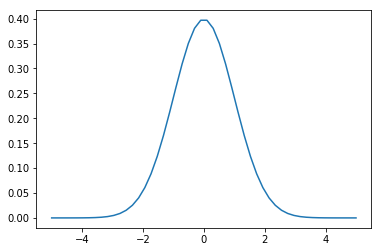

In [99]:
# import normal distribution from scipy
from scipy.stats import norm
# import numpy library and name it "np".
import numpy as np
# import matplotlib.pyplot and name it "plt"
import matplotlib.pyplot as plt

mu = 0
sigma = 1
x = np.linspace(-5, 5)

plt.plot(x, norm.pdf(x, mu, sigma))


Confirm that it is properly normalized. Define normal_distribution_function(x, mu, sigma) as an anonymous function of x, with mu = 0 and sigma = 1 inherited from the earlier assignments.

In [100]:
# quad method computes a definite integral and it is a method in scipy.integrate
from scipy.integrate import quad

# fist we need to define our function
def normal_distribution_function(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

check_norm, err = quad(normal_distribution_function, -np.inf, np.inf, args=(mu, sigma))
print(np.around(check_norm, decimals=4))

1.0


Confirm that 68% of the area lies in the range $x \in(-\sigma, \sigma)$.

In [101]:
check_area, err = quad(normal_distribution_function, -sigma, sigma, args=(mu, sigma))
print(np.around(check_area, decimals=4))

0.6827


Determine the first two moments. Analytically, the first moment is zero and the second moment is unity. The numerical result for the first moment is nonzero but insignificant.

In [140]:
# fist we need to define our function
def func_first_moment(x, mu, sigma):
    return x**2 * norm.pdf(x, mu, sigma)

first_moment, err = quad(func_first_moment, -np.inf, np.inf, args=(mu, sigma))

print(np.around(first_moment, decimals=4))

1.0


## 3.2 The Gaussian probability distribution function
### 3.2.1 Probability calculations
Hughes and Hase define the error function differently from Python and other standard references. In Python the function defined by (3.8) is called the normal cumulative distribution function, and is given by the function normcdf. The more common notation is
$$ \Phi(x; \bar{x}, \sigma) \equiv \frac{1}{\sigma \sqrt{2\pi}} \int^{x_1}_{-\infty} \exp [-\frac{(x-\bar{x})^2}{2\sigma^2}] d x
$$

the *error function* is defined (usually) as,
$$
\erf{(x)} \equiv \frac{2}{\sqrt{\pi}}\int^{x}_{0}e^{-t^2}dt,
$$
and is realted to $\Phi(x, \bar{x}, \sigma)$ (or $Erf(x;\bar{x}, \sigma) $ in the notation of Hughes and Hase) by
$$
\Phi(x; \bar{x}, \sigma) = \frac{1}{2}[1 - \erf(\frac{-(x-\bar{x})}{\sigma\sqrt{2}}) ]
$$

Check:

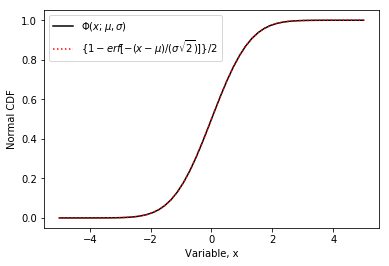

In [137]:
from scipy.special import erf
import matplotlib.pyplot as plt
plt.plot(x, norm.cdf(x, mu, sigma), 'k-', x, (1/2) * (1 - erf(-(x-mu)/(sigma*np.sqrt(2)))), 'r:')
plt.xlabel('Variable, x')
plt.ylabel('Normal CDF')
# plt.legend([r'$\Phi(x;\mu,\sigma)$', r'$\{1 - erf[-(x-\mu)/(\sigma\surd{2})]\}/2$'])
plt.legend([r'$\Phi(x;\mu,\sigma)$', '$\{1 - erf[-(x-\mu)/(\sigma\sqrt{2})]\}/2$'])

## 3.3 Confidence limits and error bars
Check (3.10) using normcdf.

In [141]:
one_sigma_frac = norm.cdf(mu+sigma, mu, sigma) - norm.cdf(mu-sigma, mu, sigma)
print(np.around(one_sigma_frac, decimals=4))

0.6827


Alternatively, use $\erf$. The symmetry $\erf{(x)} = \erf{(-x)} $ allows simplification:

$$P = \Phi(\bar{x}+\sigma; \bar{x}, \sigma) - P = \Phi(\bar{x}-\sigma; \bar{x}, \sigma) =\erf{(\frac{1}{\sqrt2})}$$

In [145]:

print(np.around(erf(1/np.sqrt(2)), decimals=4))

0.6827


### 3.3.1 Extended ranges
Check Table 3.1. 

In [148]:
range_in_sigma = [1, 1.65, 2, 2.58, 3]
frac_percent = erf(range_in_sigma/np.sqrt(2))*100
print(np.around(range_in_sigma, decimals=4), np.around(frac_percent, decimals=4))

[1.   1.65 2.   2.58 3.  ] [68.2689 90.1057 95.45   99.012  99.73  ]


### 3.3.2 Rejecting outliers
### 3.3.3 Experimental example of a Gaussian distribution
### 3.3.4 Comparing experimental results with an accepted value
Poisson probability function for discrete events